In [1]:
#if jupyternotify is installed, we can add %notify to a cell to get an alert when it ifnished running
%load_ext jupyternotify

<IPython.core.display.Javascript object>

In [2]:
import metrics_helpers as indicators
import pickle as pk
import gc
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
def dt_to_int(dt): #datetime to integer
    return dt.astype('int')/(10**9)

In [4]:

#open the facebook data
with open('fb_merged_cleaned_flat.pkl', 'rb') as f:
    fb_search = pk.load(f)

#facebook
fb_ind = indicators.indicators(fb_search, fb=True)

fb_ind.add_term_counts()
fb_ind.add_url_term_counts()
fb_ind.add_total_likes()
fb_ind.add_available_comments()
fb_ind.add_comment_activity()
fb_ind.add_num_unique_posters()
fb_ind.add_num_urls()
fb_ind.add_avg_comment_length()
fb_ind.add_avg_post_length()
fb_ind.add_post_time()
fb_ind.add_post_language()
fb_ind.add_lexical_richness()
fb_ind.add_newline_count()

fb_search = fb_ind.results_dict

/usr/local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [5]:
#netmums


with open('/Users/sma/Documents/INRAE internship/scrape-git/netmums/allposts_rerun.pkl', 'rb') as f:
    netmums = pk.load(f)

    
nm_ind = indicators.indicators(netmums, fb=False)
#this one takes long, around 20 seconds I think.

nm_ind.add_term_counts()
nm_ind.add_url_term_counts()
nm_ind.add_total_likes()
nm_ind.add_available_comments()
nm_ind.add_comment_activity()
nm_ind.add_num_unique_posters()
nm_ind.add_num_urls()
nm_ind.add_avg_post_length()
nm_ind.add_post_time()
nm_ind.add_lexical_richness()

netmums = nm_ind.results_dict

In [6]:
import pandas as pd

In [7]:
nmdf = pd.DataFrame.from_dict(netmums).transpose()
nmdf = nmdf.drop(columns=['posts', 'term_counts', 'url_term_counts', 'query'])

# Pre-processing


## move term counts to separate columns

### netmums

In [8]:
terms = list([n for n in netmums.values()][0]['term_counts'].keys())

for term_key in terms:
    d = {url_key: value['term_counts'][term_key] for url_key, value in netmums.items()}
    nmdf['term_counts_' + term_key] = nmdf.index.map(d)
    
for term_key in terms:
    d = {url_key: value['url_term_counts'][term_key] for url_key, value in netmums.items()}
    nmdf['url_term_counts_'+ term_key] = nmdf.index.map(d)

In [9]:
nmdf = nmdf.reset_index()
nmdf = nmdf.rename(columns={"index":"url"})
nmdf

,url,title,total_likes,available_comments,comment_activity,num_unique_posters,num_urls,avg_post_length,post_time,lexical_richness,...,url_term_counts_toxic,url_term_counts_toxin,url_term_counts_veg,url_term_counts_vegetable,url_term_counts_veggie,url_term_counts_vet,url_term_counts_veterinary,url_term_counts_virus,url_term_counts_vomitoxin,url_term_counts_yoghurt
0,https://www.netmums.com/coffeehouse/drop-clini...,Aptamil Hungry Baby making LO sick??,0,20,20,2,4,929.1,2011-10-30 08:56:00,141.759,...,0,0,0,0,0,0,0,0,0,0
1,https://www.netmums.com/coffeehouse/becoming-m...,Mam bottles,0,17,17,5,0,200.353,2016-01-20 12:41:00,120.208,...,0,0,0,0,0,0,0,0,0,0
2,https://www.netmums.com/coffeehouse/other-chat...,DEAD INSECT IN SAINSBURYS FOOD!,0,30,30,9,0,213.8,2012-02-19 19:55:00,190.436,...,0,0,0,0,0,0,0,0,0,0
3,https://www.netmums.com/coffeehouse/home-garde...,buying a house near a factory is it a bad idea?,0,5,5,3,1,534,2017-09-04 21:13:00,133.82,...,0,0,0,0,0,0,0,0,0,0
4,https://www.netmums.com/coffeehouse/home-garde...,URGENT ADVISE NEEDED PLEASE - oven cleaner fumes,0,5,5,1,0,228.8,2007-11-18 22:51:00,99.834,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6518,https://www.netmums.com/coffeehouse/becoming-m...,Thrush treatment in late pregnancy,0,14,14,2,0,337.071,2011-05-02 19:12:00,112.864,...,0,0,0,0,0,0,0,0,0,0
6519,https://www.netmums.com/coffeehouse/becoming-m...,Does anyone know .............,0,12,12,2,0,260.583,2014-07-29 22:25:00,155.432,...,0,0,0,0,0,0,0,0,0,0
6520,https://www.netmums.com/coffeehouse/being-mum-...,kids shopping trolleys,0,7,7,1,0,327,2012-04-13 18:47:00,141.132,...,0,0,0,0,0,0,0,0,0,0
6521,https://www.netmums.com/coffeehouse/other-chat...,Halloween food ideas,0,12,12,9,6,483.083,2016-10-31 20:20:00,138.818,...,0,0,0,0,0,0,0,0,0,0


### facebook

In [10]:
fbdf = pd.DataFrame.from_dict(fb_search).transpose()
fbdf = fbdf.drop(columns=['data', 'term_counts', 'url_term_counts', 'query'])

terms = list([n for n in fb_search.values()][0]['term_counts'].keys())

for term_key in terms:
    d = {url_key: value['term_counts'][term_key] for url_key, value in fb_search.items()}
    fbdf['term_counts_' + term_key] = fbdf.index.map(d)
    
for term_key in terms:
    d = {url_key: value['url_term_counts'][term_key] for url_key, value in fb_search.items()}
    fbdf['url_term_counts_'+ term_key] = fbdf.index.map(d)
    
fbdf = fbdf.reset_index()
fbdf = fbdf.rename(columns={"index":"url"})
fbdf

,url,total_likes,available_comments,comment_activity,num_unique_posters,num_urls,avg_post_length,post_time,post_language,lexical_richness,...,url_term_counts_toxic,url_term_counts_toxin,url_term_counts_veg,url_term_counts_vegetable,url_term_counts_veggie,url_term_counts_vet,url_term_counts_veterinary,url_term_counts_virus,url_term_counts_vomitoxin,url_term_counts_yoghurt
0,https://www.facebook.com/SGiMED/posts/looks-li...,0,0,0,1,4,874,2017-07-05 15:03:00,"(ENGLISH, en, 99, 992.0)",152.46,...,0,0,0,0,0,0,0,0,0,0
1,https://www.facebook.com/115916103439458/posts...,0,1,1,2,0,243,2020-07-12 10:18:00,"(ENGLISH, en, 99, 917.0)",78.4467,...,0,0,0,0,0,0,0,0,0,0
2,https://www.facebook.com/115169316933829/posts...,0,0,0,1,0,53,2020-10-01 08:33:00,"(ENGLISH, en, 56, 548.0)",23.66,...,0,0,0,0,0,0,0,0,0,0
3,https://www.facebook.com/PannKaungShweSinFoodA...,2,0,0,1,0,NaN,2020-11-28 16:53:00,"(Unknown, un, 0, 0.0)",0,...,0,0,0,0,0,0,0,0,0,0
4,https://www.facebook.com/HZGlobalFruits/posts/...,260,37,37,36,116,4416,2019-11-11 06:15:00,"(ENGLISH, en, 94, 836.0)",52.1538,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6777,https://facebook.com/story.php?story_fbid=1594...,5,0,0,1,4,598,2020-12-15 04:00:00,"(ENGLISH, en, 99, 929.0)",128,...,0,0,0,0,0,0,0,0,0,0
6778,https://facebook.com/story.php?story_fbid=1593...,5,0,0,1,4,619,2020-12-14 04:10:00,"(ENGLISH, en, 99, 969.0)",197.12,...,0,0,0,0,0,0,0,0,0,0
6779,https://facebook.com/story.php?story_fbid=1593...,12,1,1,2,4,588,2020-12-13 18:53:00,"(ENGLISH, en, 99, 855.0)",246.96,...,0,0,0,0,0,0,0,0,0,0
6780,https://facebook.com/story.php?story_fbid=1559...,69,5,6,6,2,753,2020-11-03 11:48:00,"(ENGLISH, en, 99, 1076.0)",241.92,...,0,0,0,0,0,0,0,0,0,0


In [11]:
gc.collect()

20

## Create two term totals
combine counts for terms which are hazards and terms which are products.

In [12]:
#choose terms to count in totals
term_count_df = nmdf[nmdf.columns[pd.Series(nmdf.columns).str.startswith('term_counts_')]]

products = term_count_df.columns[[5,12,13,17,33, 34, 35, 44,45,57, 58, 65,66,68, 69,70,78, 79,80, 85]]
hazards = term_count_df.columns[[1,2,3,9,10,11,14,15,16,18,
                                 19,20,21,22,23,24,25,26,27,
                                 28,30,31,37,38,39,40,
                                 41,42,43,46,47,48,49,50,51,
                                 52,53,54,55,56,59,60,61,62,
                                 63,64,67,71,72,73,74,75,76,
                                 77,81,82,83,84]]


In [13]:
hazards

Index(['term_counts_acrylamid', 'term_counts_acrylamide',
       'term_counts_additives', 'term_counts_bacteria',
       'term_counts_biphenyls', 'term_counts_bisphenol', 'term_counts_bpa',
       'term_counts_campylobacter', 'term_counts_carcinogen',
       'term_counts_chemical', 'term_counts_chemicals',
       'term_counts_contaminants', 'term_counts_contaminated',
       'term_counts_cronobacter', 'term_counts_deoxynivalenol',
       'term_counts_dioxin', 'term_counts_disruptor', 'term_counts_drugs',
       'term_counts_e-coli', 'term_counts_ecoli', 'term_counts_endocrine',
       'term_counts_estrogen', 'term_counts_fungus', 'term_counts_genetically',
       'term_counts_gm', 'term_counts_gmo', 'term_counts_hazard',
       'term_counts_histamine', 'term_counts_hydrocarbons',
       'term_counts_listeria', 'term_counts_metals', 'term_counts_microbes',
       'term_counts_microbiologic', 'term_counts_moah', 'term_counts_modified',
       'term_counts_moh', 'term_counts_mold', 'term_

In [14]:
products

Index(['term_counts_applesauce', 'term_counts_bottle',
       'term_counts_bottle-fed', 'term_counts_cereal', 'term_counts_food',
       'term_counts_for', 'term_counts_formula', 'term_counts_jar',
       'term_counts_jarred', 'term_counts_oatmeal', 'term_counts_oats',
       'term_counts_porridge', 'term_counts_premade', 'term_counts_pudding',
       'term_counts_puree', 'term_counts_purée', 'term_counts_veg',
       'term_counts_vegetable', 'term_counts_veggie', 'term_counts_yoghurt'],
      dtype='object')

create the totals of terms in two categories.

In [15]:
#netmums
#add totals
term_count_df = nmdf[nmdf.columns[pd.Series(nmdf.columns).str.startswith('term_counts_')]]

products = term_count_df.columns[[5,12,13,17,33, 34, 35, 44,45,57, 58, 65,66,68, 69,70,78, 79,80, 85]]
hazards = term_count_df.columns[[1,2,3,4,6,7,8,9,10,11,14,15,16,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,36,37,38,39,40,41,42,43,46,47,48,49,50,51,52,53,54,55,56,59,60,61,62,63,64,67,71,72,73,74,75,76,77,81,82,83,84]]


term_count_hazard_df = term_count_df[hazards]
term_count_product_df = term_count_df[products]

url_term_count_df = nmdf[nmdf.columns[pd.Series(nmdf.columns).str.startswith('url_term_counts_')]]

url_term_count_hazard_df = url_term_count_df['url_' + hazards]
url_term_count_product_df = url_term_count_df['url_' + products] 


nmdf['total_term_count'] = term_count_df.sum(axis=1) #make sure there's no s because we can easily filter the non totals then with contains.
nmdf['total_url_term_count'] = term_count_df.sum(axis=1)

nmdf['total_term_count_hazard'] = term_count_hazard_df.sum(axis=1) #make sure there's no s because we can easily filter the non totals then with contains.
nmdf['total_url_term_count_hazard'] = url_term_count_hazard_df.sum(axis=1)

nmdf['total_term_count_product'] = term_count_product_df.sum(axis=1) #make sure there's no s because we can easily filter the non totals then with contains.
nmdf['total_url_term_count_product'] = url_term_count_product_df.sum(axis=1)

In [16]:
# facebook

#add totals
term_count_df = fbdf[fbdf.columns[pd.Series(fbdf.columns).str.startswith('term_counts_')]]

term_count_hazard_df = term_count_df[hazards]
term_count_product_df = term_count_df[products]

url_term_count_hazard_df = url_term_count_df['url_' + hazards]
url_term_count_product_df = url_term_count_df['url_' + products]

url_term_count_df = fbdf[fbdf.columns[pd.Series(fbdf.columns).str.startswith('url_term_counts_')]]

fbdf['total_term_count'] = term_count_df.sum(axis=1) #make sure there's no s because we can easily filter the non totals then with contains.
fbdf['total_url_term_count'] = term_count_df.sum(axis=1)

fbdf['total_term_count_hazard'] = term_count_hazard_df.sum(axis=1) #make sure there's no s because we can easily filter the non totals then with contains.
fbdf['total_url_term_count_hazard'] = url_term_count_hazard_df.sum(axis=1)

fbdf['total_term_count_product'] = term_count_product_df.sum(axis=1) #make sure there's no s because we can easily filter the non totals then with contains.
fbdf['total_url_term_count_product'] = url_term_count_product_df.sum(axis=1)

### Facebook Only: Choose only English Results

check the lowest scoring english categories to see if they are indeed english.

According to this source, I believe the last number is a score. https://github.com/aboSamoor/pycld2/blob/e3ac86ed4d4902e912691c1531d0c5645382a726/bindings/pycldmodule.cc

PyObject *details = PyTuple_New(3);
  for (Py_ssize_t idx = 0; idx < 3; idx++) {
    CLD2::Language lang = language3[idx];
    // Steals ref
    PyTuple_SET_ITEM(details,
                     idx,
                     Py_BuildValue("(ssif)",
                                   CLD2::LanguageName(lang),
                                   CLD2::LanguageCode(lang),
                                   percent3[idx],
                                   normalized_score3[idx]))

In [17]:
english_fb_view = fbdf.loc[fbdf.post_language.str[0].str.contains('ENGLISH') == 1]

#we sort by the size of the range detected as english. the last two numbers are the range of bits which 
#were detected as english.
fbdf = english_fb_view.loc[english_fb_view.post_language.str[3].sort_values().index]
fbdf


,url,total_likes,available_comments,comment_activity,num_unique_posters,num_urls,avg_post_length,post_time,post_language,lexical_richness,...,url_term_counts_veterinary,url_term_counts_virus,url_term_counts_vomitoxin,url_term_counts_yoghurt,total_term_count,total_url_term_count,total_term_count_hazard,total_url_term_count_hazard,total_term_count_product,total_url_term_count_product
1744,https://facebook.com/story.php?story_fbid=1776...,1,0,0,1,2,241,2018-01-28 14:58:00,"(ENGLISH, en, 98, 109.0)",0,...,0,0,0,0,0,0,0,0.0,0,0.0
5918,https://facebook.com/story.php?story_fbid=2214...,0,0,0,1,0,77,2020-02-29 22:12:00,"(ENGLISH, en, 98, 126.0)",0,...,0,0,0,0,0,0,0,0.0,0,0.0
5917,https://facebook.com/story.php?story_fbid=2214...,0,0,0,1,0,77,2020-02-29 22:12:00,"(ENGLISH, en, 98, 126.0)",0,...,0,0,0,0,0,0,0,1.0,0,0.0
5916,https://facebook.com/story.php?story_fbid=2214...,0,0,0,1,0,77,2020-02-29 22:13:00,"(ENGLISH, en, 98, 126.0)",0,...,0,0,0,0,0,0,0,0.0,0,0.0
6299,https://facebook.com/story.php?story_fbid=1535...,5,1,1,2,0,NaN,2015-01-01 06:38:00,"(ENGLISH, en, 83, 204.0)",0,...,0,0,0,0,0,0,0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,https://facebook.com/story.php?story_fbid=7049...,12,0,0,1,2,71,2020-09-17 13:37:00,"(ENGLISH, en, 95, 2092.0)",0,...,0,0,0,0,0,0,0,0.0,0,0.0
2289,https://facebook.com/story.php?story_fbid=1612...,1,0,0,1,0,23,2021-03-16 09:00:00,"(ENGLISH, en, 95, 2096.0)",0,...,0,0,0,0,0,0,0,0.0,0,0.0
2270,https://facebook.com/story.php?story_fbid=1642...,1,0,0,1,0,13,2021-04-26 19:17:00,"(ENGLISH, en, 90, 2252.0)",2.52,...,0,0,0,0,0,0,0,0.0,0,0.0
3535,https://facebook.com/story.php?story_fbid=1581...,3,1,1,2,0,NaN,2017-11-06 19:56:00,"(ENGLISH, en, 80, 2304.0)",0,...,0,0,0,0,0,0,0,0.0,0,0.0


it seems to work pretty well! It's all english!. so roughtly 90% of results are english


## Examine the Pandas Dataframes.

In [18]:
#we want to plot these
nmdf[nmdf.columns[pd.Series(nmdf.columns).str.contains('term_counts_') == 0]].drop(['url','title'],axis=1)

,total_likes,available_comments,comment_activity,num_unique_posters,num_urls,avg_post_length,post_time,lexical_richness,total_term_count,total_url_term_count,total_term_count_hazard,total_url_term_count_hazard,total_term_count_product,total_url_term_count_product
0,0,20,20,2,4,929.1,2011-10-30 08:56:00,141.759,68,68,38,0,30,0
1,0,17,17,5,0,200.353,2016-01-20 12:41:00,120.208,4,4,2,0,2,0
2,0,30,30,9,0,213.8,2012-02-19 19:55:00,190.436,28,28,15,0,13,0
3,0,5,5,3,1,534,2017-09-04 21:13:00,133.82,4,4,4,0,0,0
4,0,5,5,1,0,228.8,2007-11-18 22:51:00,99.834,2,2,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6518,0,14,14,2,0,337.071,2011-05-02 19:12:00,112.864,4,4,2,0,2,0
6519,0,12,12,2,0,260.583,2014-07-29 22:25:00,155.432,4,4,3,0,1,0
6520,0,7,7,1,0,327,2012-04-13 18:47:00,141.132,2,2,1,0,1,0
6521,0,12,12,9,6,483.083,2016-10-31 20:20:00,138.818,8,8,1,0,7,0


In [19]:
fbdf[fbdf.columns[pd.Series(fbdf.columns).str.contains('term_counts_') == 0]]

,url,total_likes,available_comments,comment_activity,num_unique_posters,num_urls,avg_post_length,post_time,post_language,lexical_richness,newline_count,avg_comment_length,total_term_count,total_url_term_count,total_term_count_hazard,total_url_term_count_hazard,total_term_count_product,total_url_term_count_product
1744,https://facebook.com/story.php?story_fbid=1776...,1,0,0,1,2,241,2018-01-28 14:58:00,"(ENGLISH, en, 98, 109.0)",0,3,NaN,0,0,0,0.0,0,0.0
5918,https://facebook.com/story.php?story_fbid=2214...,0,0,0,1,0,77,2020-02-29 22:12:00,"(ENGLISH, en, 98, 126.0)",0,0,NaN,0,0,0,0.0,0,0.0
5917,https://facebook.com/story.php?story_fbid=2214...,0,0,0,1,0,77,2020-02-29 22:12:00,"(ENGLISH, en, 98, 126.0)",0,0,NaN,0,0,0,1.0,0,0.0
5916,https://facebook.com/story.php?story_fbid=2214...,0,0,0,1,0,77,2020-02-29 22:13:00,"(ENGLISH, en, 98, 126.0)",0,0,NaN,0,0,0,0.0,0,0.0
6299,https://facebook.com/story.php?story_fbid=1535...,5,1,1,2,0,NaN,2015-01-01 06:38:00,"(ENGLISH, en, 83, 204.0)",0,0,4,0,0,0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,https://facebook.com/story.php?story_fbid=7049...,12,0,0,1,2,71,2020-09-17 13:37:00,"(ENGLISH, en, 95, 2092.0)",0,2,NaN,0,0,0,0.0,0,0.0
2289,https://facebook.com/story.php?story_fbid=1612...,1,0,0,1,0,23,2021-03-16 09:00:00,"(ENGLISH, en, 95, 2096.0)",0,0,NaN,0,0,0,0.0,0,0.0
2270,https://facebook.com/story.php?story_fbid=1642...,1,0,0,1,0,13,2021-04-26 19:17:00,"(ENGLISH, en, 90, 2252.0)",2.52,0,NaN,0,0,0,0.0,0,0.0
3535,https://facebook.com/story.php?story_fbid=1581...,3,1,1,2,0,NaN,2017-11-06 19:56:00,"(ENGLISH, en, 80, 2304.0)",0,0,3,0,0,0,0.0,0,0.0


In [20]:
gc.collect()

20

## Post-2016 Subset

In [21]:
from datetime import datetime

In [22]:
time_cutoff = datetime(2016,1,1, 0, 0, 0, 0)

In [23]:
nmdf = nmdf.loc[nmdf.post_time >= time_cutoff]
fbdf = fbdf.loc[fbdf.post_time >= time_cutoff]

## Modify Time so We can Graph It.

In [24]:
from datetime import datetime
nmdf['int_post_time'] = dt_to_int(nmdf.post_time.dropna()) 
fbdf['int_post_time'] = dt_to_int(fbdf.post_time.dropna()) 

<ipython-input-24-11a850386a5b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nmdf['int_post_time'] = dt_to_int(nmdf.post_time.dropna())
<ipython-input-24-11a850386a5b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fbdf['int_post_time'] = dt_to_int(fbdf.post_time.dropna())


# Pair Plots

Take a sample of 500 points and plot the pair plots of our indicators.
Datetime could not be plotted, so it's converted to int. We can estimate on the graph what the corresponding date is by looking at quantiles.
Lexical richness uses a measure called MTLD, which should be less biased for short documents than the most common TTR (Type-Token Ratio)

## Netmums

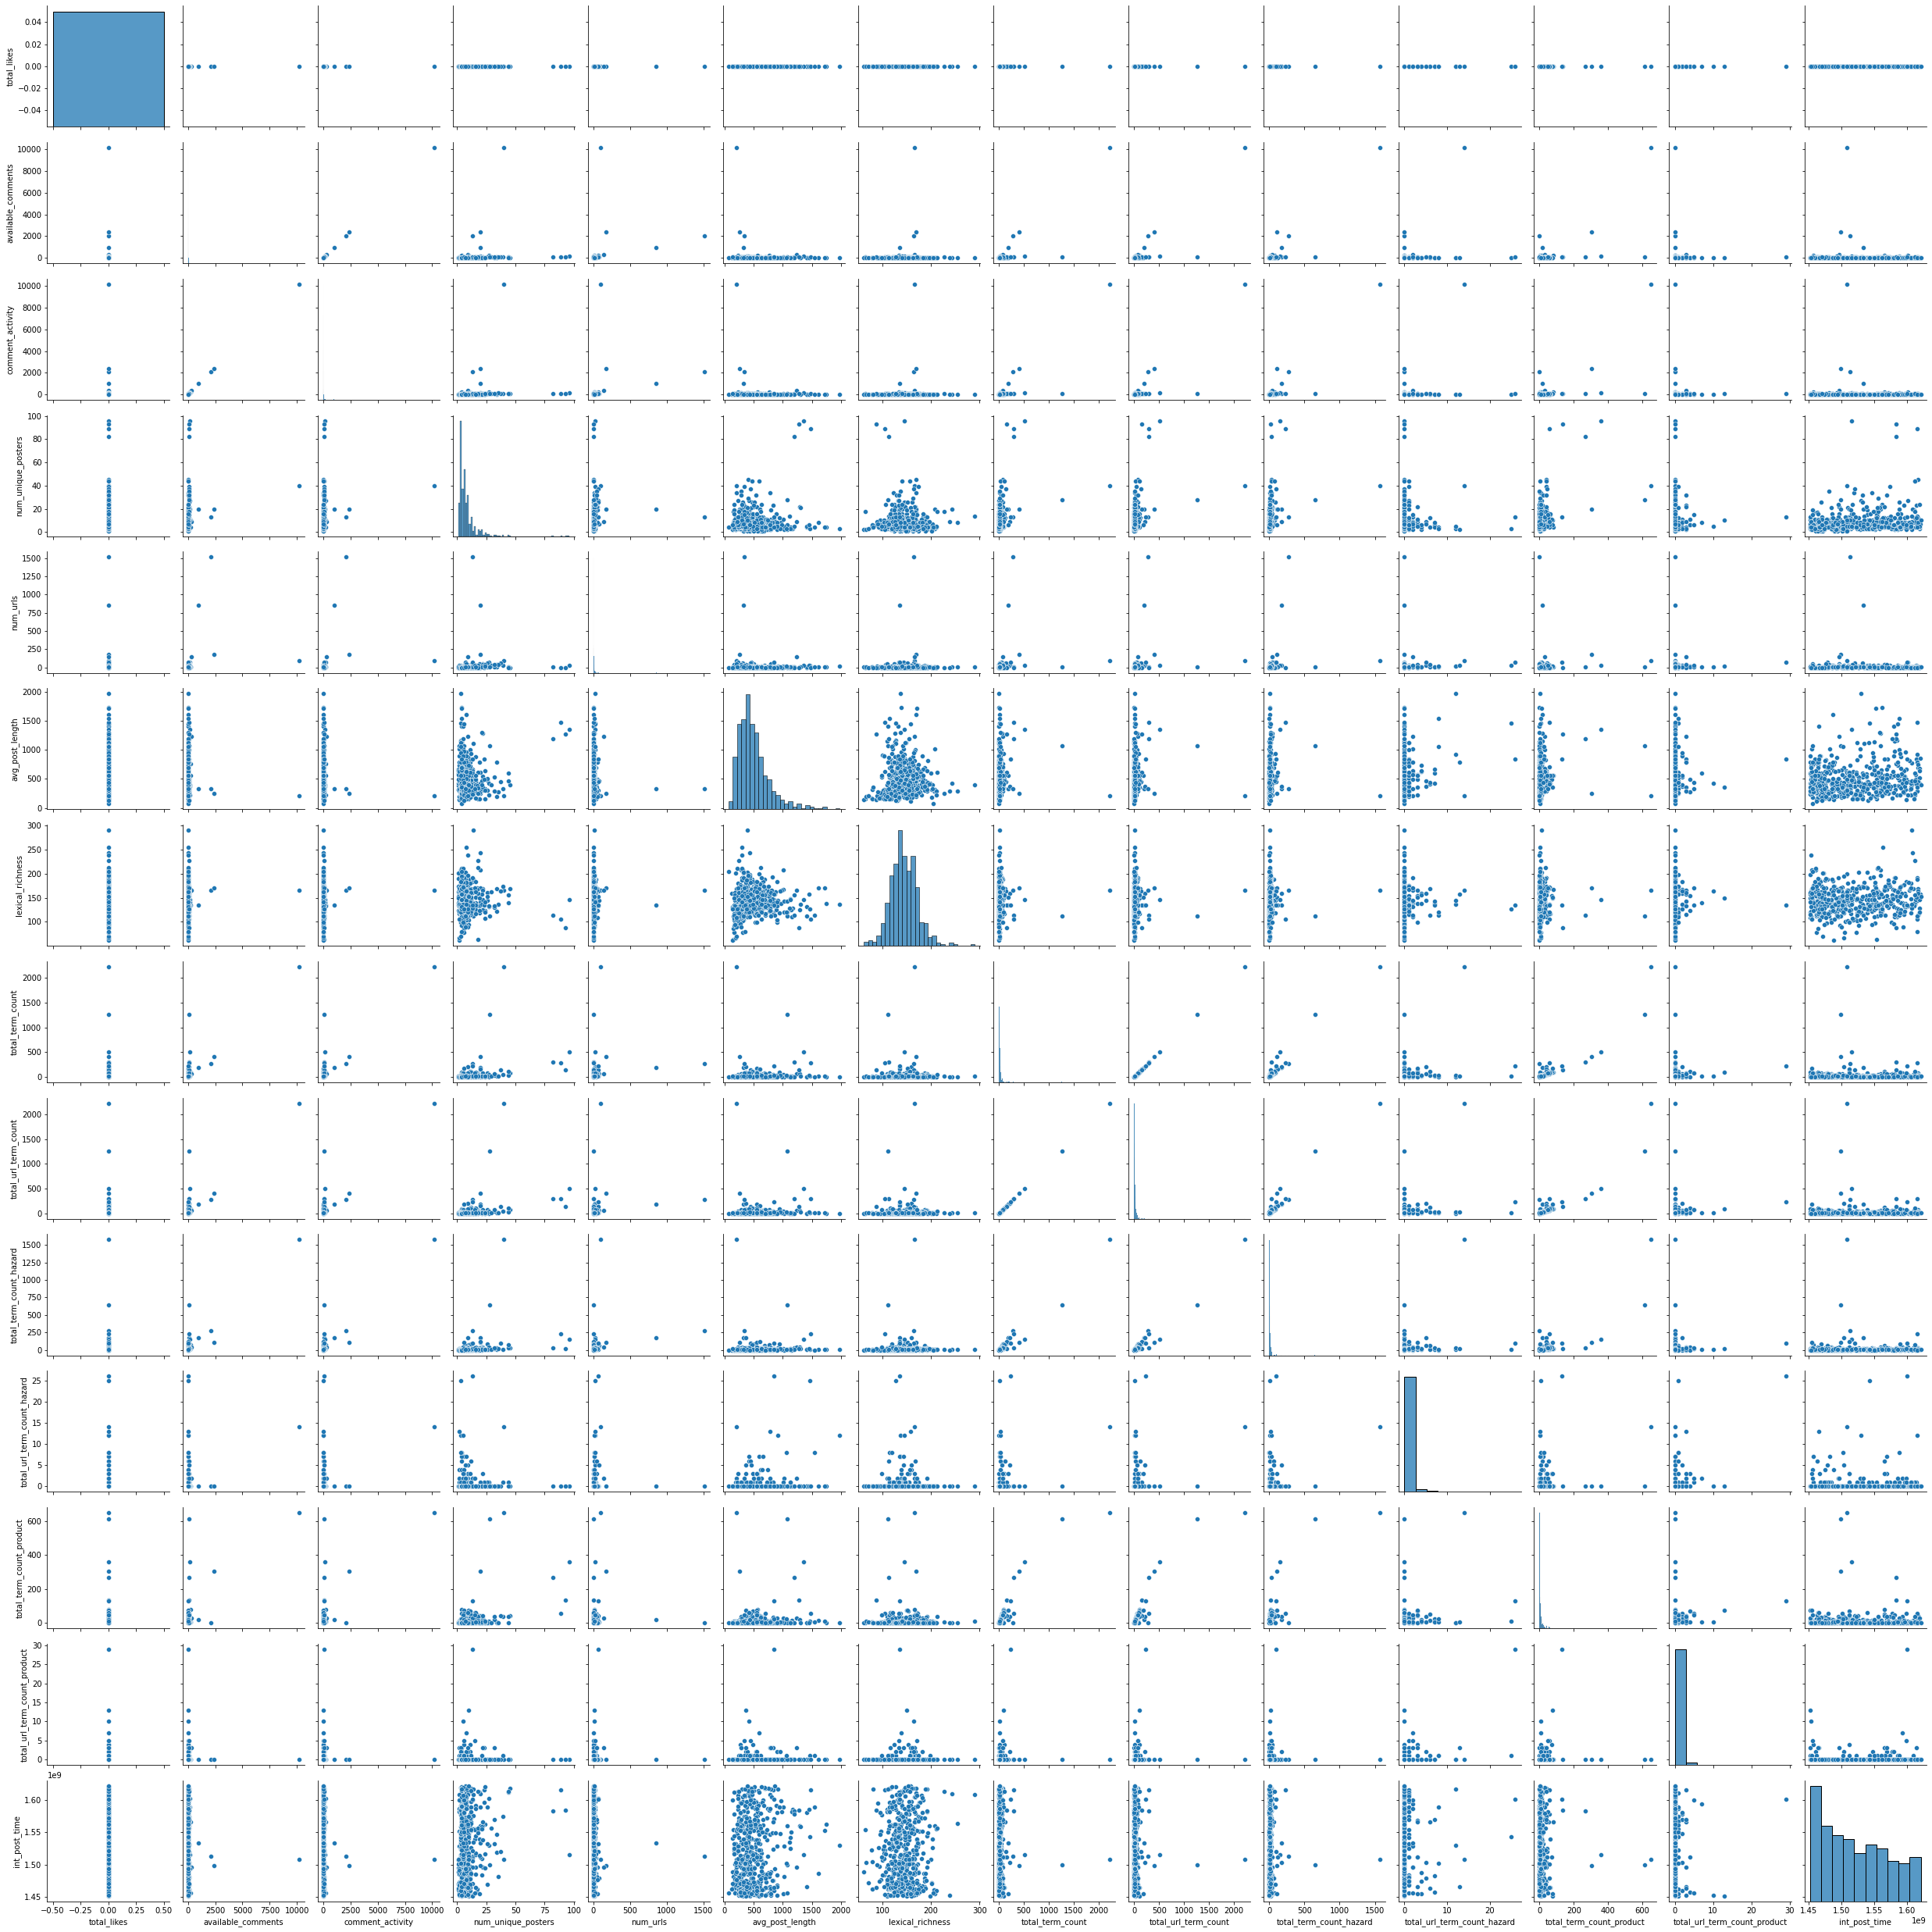

In [25]:
sample = nmdf[nmdf.columns[pd.Series(nmdf.columns).str.contains('term_counts_') == 0]].drop(['url','title'],axis=1).sample(500)
sns.pairplot(sample)

In [62]:
#correlation plot
sns.heatmap(nmdf[nmdf.columns[pd.Series(nmdf.columns).str.contains('term_counts_') == 0]].drop(['url','title'],axis=1))

TypeError: float() argument must be a string or a number, not 'Timestamp'

### Graph of Only Term Counts

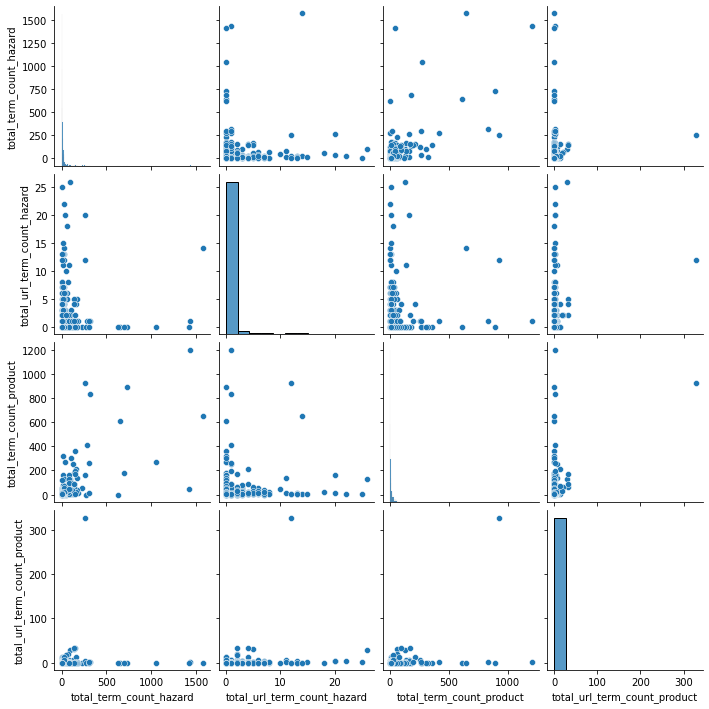

In [26]:
temp = nmdf.loc[:,'total_term_count_hazard':'total_url_term_count_product']

#remove outliers for better visual
sns.pairplot(temp[pd.Series(temp.total_term_count_hazard) <= 2000])

## Facebook

In [27]:
fb_sample = fbdf[fbdf.columns[pd.Series(fbdf.columns).str.contains('term_counts_') == 0]].drop(['url'],axis=1).sample(500)


<IPython.core.display.Javascript object>

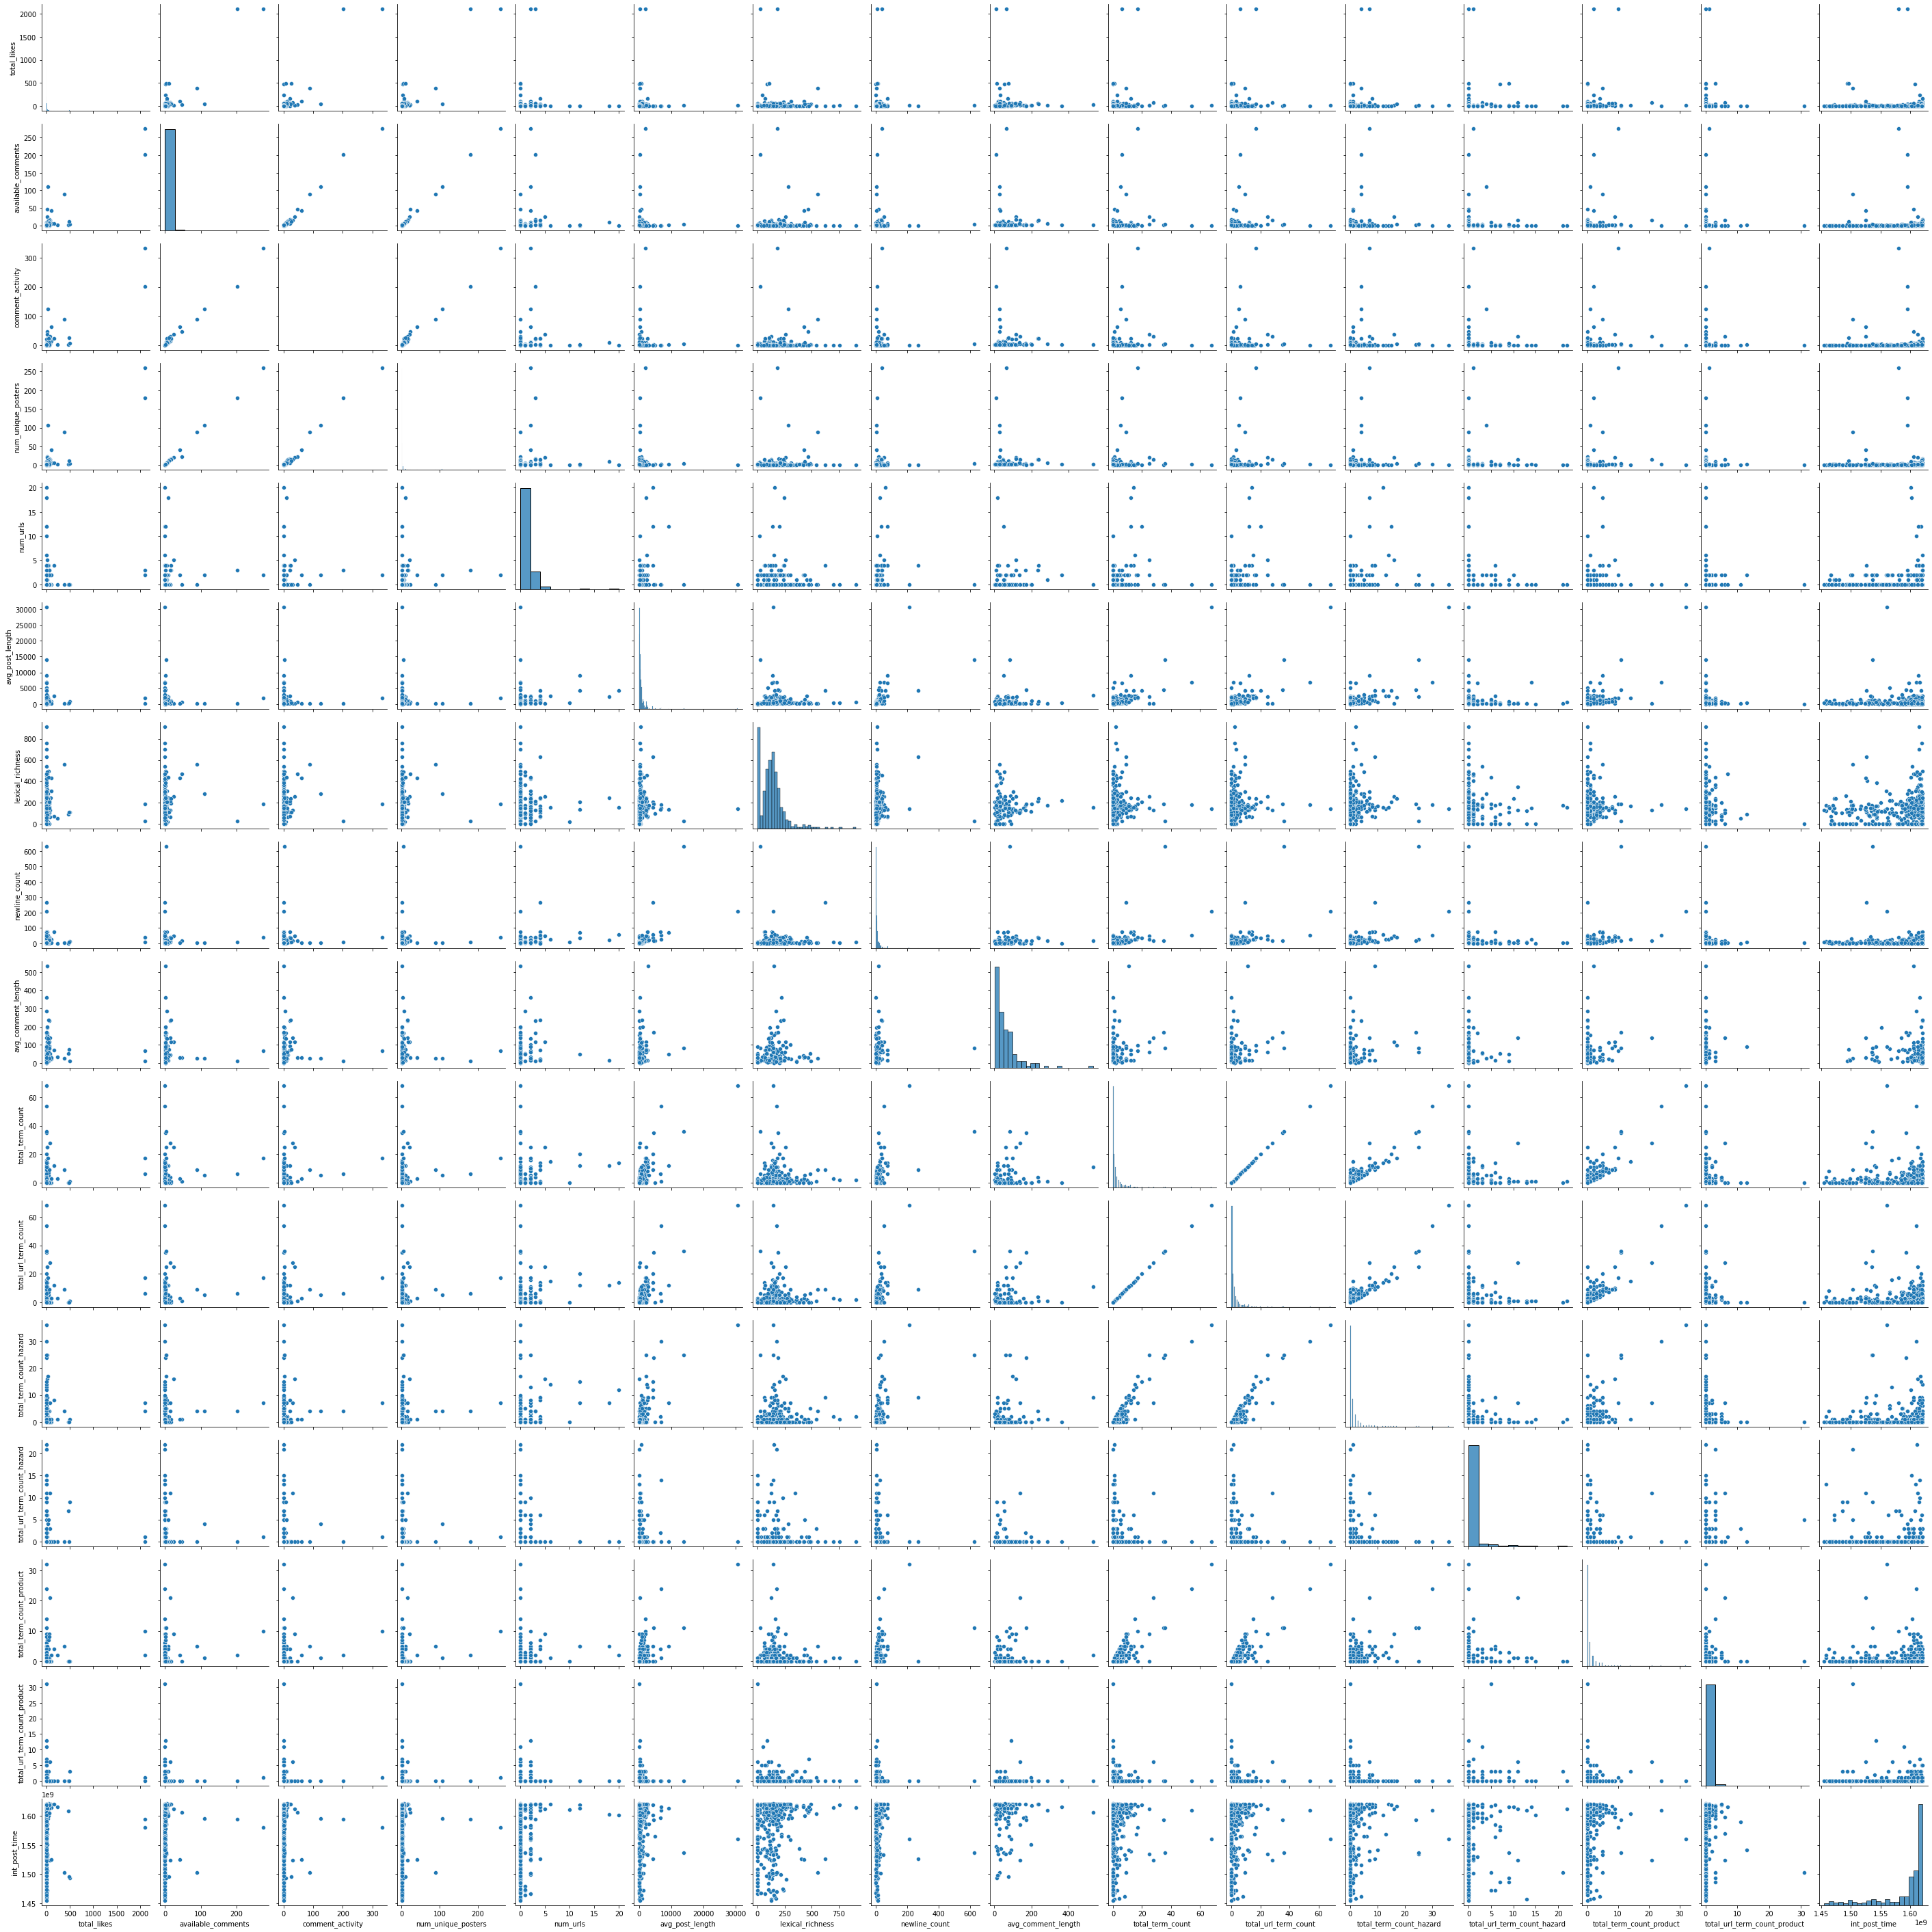

In [28]:
fb_sample = fbdf[fbdf.columns[pd.Series(fbdf.columns).str.contains('term_counts_') == 0]].drop(['url'],axis=1).sample(500)
sns.pairplot(fb_sample)
%notify

<IPython.core.display.Javascript object>

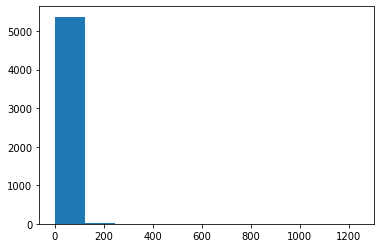

In [29]:
plt.hist(fbdf.newline_count)
%notify

### Graph of Only Term Counts

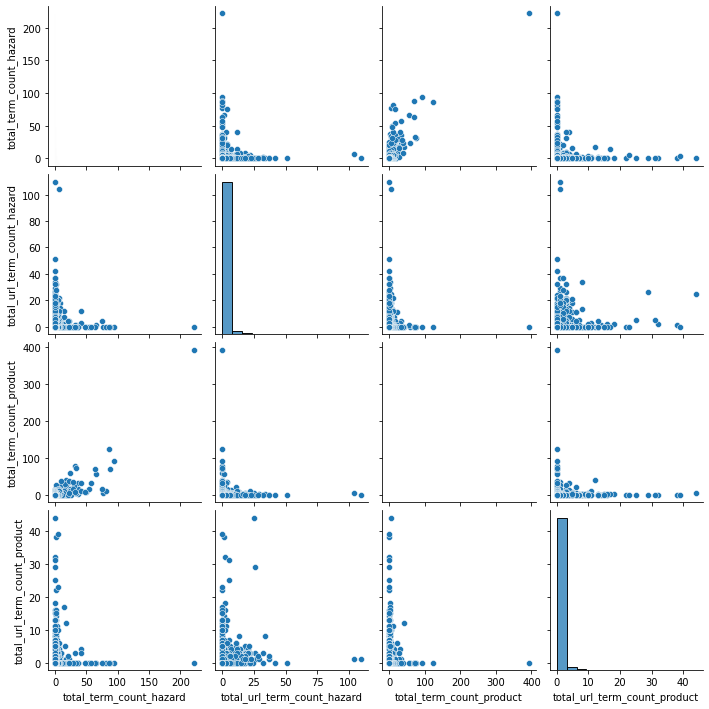

In [30]:
temp = fbdf.loc[:,'total_term_count_hazard':'total_url_term_count_product']

#remove outlier for better visual
sns.pairplot(temp[pd.Series(temp.total_term_count_hazard) <= 2000])

# Basic Descriptive Statistics


In [31]:
nm_indicators = \
['term_counts',
'url_term_counts',
'total_likes',
'available_comments',
'comment_activity',
'num_unique_posters',
'num_urls',
'avg_post_length',
'int_post_time',
'lexical_richness', 
'total_term_count_hazard',
'total_url_term_count_hazard',
'total_term_count_product',
'total_url_term_count_product']

fb_indicators = \
['term_counts',
'url_term_counts',
'total_likes',
'available_comments',
'comment_activity',
'num_unique_posters',
'num_urls',
'avg_comment_length',
'avg_post_length',
'int_post_time',
'lexical_richness', 
'total_term_count_hazard',
'total_url_term_count_hazard',
'total_term_count_product',
'total_url_term_count_product']

## Netmums

In [32]:
nmdf.columns[nmdf.columns.isin(nm_indicators)] #list like

Index(['total_likes', 'available_comments', 'comment_activity',
       'num_unique_posters', 'num_urls', 'avg_post_length', 'lexical_richness',
       'total_term_count_hazard', 'total_url_term_count_hazard',
       'total_term_count_product', 'total_url_term_count_product',
       'int_post_time'],
      dtype='object')

### Quantiles

In [33]:
{str(indicator): np.quantile(nmdf[indicator], [0.25,0.5,0.75]) for indicator in nmdf.columns[nmdf.columns.isin(nm_indicators)]}

{'total_likes': array([0.0, 0.0, 0.0], dtype=object),
 'available_comments': array([9.0, 15.0, 27.0], dtype=object),
 'comment_activity': array([9.0, 15.0, 27.0], dtype=object),
 'num_unique_posters': array([4.0, 6.0, 9.0], dtype=object),
 'num_urls': array([0.0, 3.0, 8.0], dtype=object),
 'avg_post_length': array([312.75, 437.9956521739131, 620.0178571428571], dtype=object),
 'lexical_richness': array([126.32631233595801, 142.53975864368812, 159.53968744831803],
       dtype=object),
 'total_term_count_hazard': array([ 2.,  5., 12.]),
 'total_url_term_count_hazard': array([0., 0., 0.]),
 'total_term_count_product': array([ 1.,  4., 12.]),
 'total_url_term_count_product': array([0., 0., 0.]),
 'int_post_time': array([1.47299560e+09, 1.50903117e+09, 1.55624736e+09])}

### Means

In [34]:
{str(indicator): np.mean(nmdf[indicator]) for indicator in nmdf.columns[nmdf.columns.isin(nm_indicators)]}


{'total_likes': 0.0,
 'available_comments': 81.8425925925926,
 'comment_activity': 81.8425925925926,
 'num_unique_posters': 9.410300925925926,
 'num_urls': 15.41724537037037,
 'avg_post_length': 518.1643584702922,
 'lexical_richness': 143.94925162743678,
 'total_term_count_hazard': 19.619212962962962,
 'total_url_term_count_hazard': 0.42766203703703703,
 'total_term_count_product': 19.403935185185187,
 'total_url_term_count_product': 0.5225694444444444,
 'int_post_time': 1518528017.7777777}

In [35]:
### Variance

In [36]:
{str(indicator): np.var(nmdf[indicator]) for indicator in nmdf.columns[nmdf.columns.isin(nm_indicators)]}


{'total_likes': 0.0,
 'available_comments': 1347984.0678155008,
 'comment_activity': 1347984.0678155008,
 'num_unique_posters': 398.7801485205548,
 'num_urls': 26984.459586856465,
 'avg_post_length': 101910.43016536202,
 'lexical_richness': 907.0167818187582,
 'total_term_count_hazard': 16408.96842715835,
 'total_url_term_count_hazard': 3.9311098117069614,
 'total_term_count_product': 42698.88081784767,
 'total_url_term_count_product': 66.79925913869599,
 'int_post_time': 2521714443513759.0}

### Max

In [37]:
{str(indicator): np.max(nmdf[indicator]) for indicator in nmdf.columns[nmdf.columns.isin(nm_indicators)]}


{'total_likes': 0,
 'available_comments': 44543,
 'comment_activity': 44543,
 'num_unique_posters': 482,
 'num_urls': 5534,
 'avg_post_length': 3650.4,
 'lexical_richness': 520.2238111888113,
 'total_term_count_hazard': 4243,
 'total_url_term_count_hazard': 26,
 'total_term_count_product': 8262,
 'total_url_term_count_product': 328,
 'int_post_time': 1621548660.0}

## Facebook

In [38]:
nmdf.columns[nmdf.columns.isin(nm_indicators)] #list like

Index(['total_likes', 'available_comments', 'comment_activity',
       'num_unique_posters', 'num_urls', 'avg_post_length', 'lexical_richness',
       'total_term_count_hazard', 'total_url_term_count_hazard',
       'total_term_count_product', 'total_url_term_count_product',
       'int_post_time'],
      dtype='object')

### Quantiles

In [39]:
{str(indicator): np.quantile(fbdf[indicator], [0.25,0.5,0.75]) for indicator in fbdf.columns[fbdf.columns.isin(fb_indicators)]}

{'total_likes': array([0.0, 2.0, 7.0], dtype=object),
 'available_comments': array([0.0, 0.0, 0.0], dtype=object),
 'comment_activity': array([0.0, 0.0, 1.0], dtype=object),
 'num_unique_posters': array([1.0, 1.0, 2.0], dtype=object),
 'num_urls': array([0.0, 0.0, 0.0], dtype=object),
 'avg_post_length': array([179.0, 343.0, 756.0], dtype=object),
 'lexical_richness': array([51.84000000000001, 123.0, 176.44307692307694], dtype=object),
 'avg_comment_length': array([nan, nan, nan], dtype=object),
 'total_term_count_hazard': array([0., 0., 1.]),
 'total_url_term_count_hazard': array([nan, nan, nan]),
 'total_term_count_product': array([0., 0., 1.]),
 'total_url_term_count_product': array([nan, nan, nan]),
 'int_post_time': array([1.57924998e+09, 1.60685310e+09, 1.61768976e+09])}

### Means

In [40]:
{str(indicator): np.mean(fbdf[indicator]) for indicator in fbdf.columns[fbdf.columns.isin(fb_indicators)]}


{'total_likes': 16.37391143227719,
 'available_comments': 2.8549193996664814,
 'comment_activity': 4.090605892162312,
 'num_unique_posters': 3.6872336483231423,
 'num_urls': 0.620159347785807,
 'avg_post_length': 716.3635490685615,
 'lexical_richness': 127.8201398870847,
 'avg_comment_length': 84.02967053845272,
 'total_term_count_hazard': 1.393366685195479,
 'total_url_term_count_hazard': 0.7567149758454106,
 'total_term_count_product': 1.1565684639614602,
 'total_url_term_count_product': 0.3804830917874396,
 'int_post_time': 1589797577.624283}

### Var

In [41]:
{str(indicator): np.var(fbdf[indicator]) for indicator in fbdf.columns[fbdf.columns.isin(fb_indicators)]}


{'total_likes': 16921.112367376256,
 'available_comments': 1058.826644782275,
 'comment_activity': 2330.0523797885367,
 'num_unique_posters': 947.281461997104,
 'num_urls': 4.8392304359757095,
 'avg_post_length': 2789775.504667104,
 'lexical_richness': 12511.899739521641,
 'avg_comment_length': 17692.270903105014,
 'total_term_count_hazard': 29.92660413698907,
 'total_url_term_count_hazard': 12.656367952577655,
 'total_term_count_product': 44.151695321095524,
 'total_url_term_count_product': 3.317454839086093,
 'int_post_time': 1610485006081916.8}

### Max

In [42]:
{str(indicator): np.max(fbdf[indicator]) for indicator in fbdf.columns[fbdf.columns.isin(fb_indicators)]}


{'total_likes': 6400,
 'available_comments': 1206,
 'comment_activity': 2500,
 'num_unique_posters': 1170,
 'num_urls': 116,
 'avg_post_length': 58361.0,
 'lexical_richness': 2402.539999999996,
 'avg_comment_length': 988.0,
 'total_term_count_hazard': 222,
 'total_url_term_count_hazard': 110.0,
 'total_term_count_product': 392,
 'total_url_term_count_product': 44.0,
 'int_post_time': 1621203899.828942}

In [43]:
fbdf = fbdf.loc[fbdf.post_time >= time_cutoff]
fbdf

,url,total_likes,available_comments,comment_activity,num_unique_posters,num_urls,avg_post_length,post_time,post_language,lexical_richness,...,url_term_counts_virus,url_term_counts_vomitoxin,url_term_counts_yoghurt,total_term_count,total_url_term_count,total_term_count_hazard,total_url_term_count_hazard,total_term_count_product,total_url_term_count_product,int_post_time
1744,https://facebook.com/story.php?story_fbid=1776...,1,0,0,1,2,241,2018-01-28 14:58:00,"(ENGLISH, en, 98, 109.0)",0,...,0,0,0,0,0,0,0.0,0,0.0,1.517151e+09
5918,https://facebook.com/story.php?story_fbid=2214...,0,0,0,1,0,77,2020-02-29 22:12:00,"(ENGLISH, en, 98, 126.0)",0,...,0,0,0,0,0,0,0.0,0,0.0,1.583014e+09
5917,https://facebook.com/story.php?story_fbid=2214...,0,0,0,1,0,77,2020-02-29 22:12:00,"(ENGLISH, en, 98, 126.0)",0,...,0,0,0,0,0,0,1.0,0,0.0,1.583014e+09
5916,https://facebook.com/story.php?story_fbid=2214...,0,0,0,1,0,77,2020-02-29 22:13:00,"(ENGLISH, en, 98, 126.0)",0,...,0,0,0,0,0,0,0.0,0,0.0,1.583014e+09
4273,https://facebook.com/story.php?story_fbid=4051...,3,0,0,1,0,183,2019-02-12 15:50:00,"(ENGLISH, en, 99, 232.0)",43.904,...,0,0,0,2,2,2,32.0,0,3.0,1.549987e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,https://facebook.com/story.php?story_fbid=7049...,12,0,0,1,2,71,2020-09-17 13:37:00,"(ENGLISH, en, 95, 2092.0)",0,...,0,0,0,0,0,0,0.0,0,0.0,1.600350e+09
2289,https://facebook.com/story.php?story_fbid=1612...,1,0,0,1,0,23,2021-03-16 09:00:00,"(ENGLISH, en, 95, 2096.0)",0,...,0,0,0,0,0,0,0.0,0,0.0,1.615885e+09
2270,https://facebook.com/story.php?story_fbid=1642...,1,0,0,1,0,13,2021-04-26 19:17:00,"(ENGLISH, en, 90, 2252.0)",2.52,...,0,0,0,0,0,0,0.0,0,0.0,1.619465e+09
3535,https://facebook.com/story.php?story_fbid=1581...,3,1,1,2,0,NaN,2017-11-06 19:56:00,"(ENGLISH, en, 80, 2304.0)",0,...,0,0,0,0,0,0,0.0,0,0.0,1.509998e+09


## Correlations


In [65]:
temp = nmdf[nmdf.columns[nmdf.columns.isin(nm_indicators)]].copy()

In [83]:
temp = temp.astype(np.float)
temp = temp.dropna().copy()

In [84]:
temp.total_likes

1       0.0
3       0.0
5       0.0
7       0.0
10      0.0
       ... 
6502    0.0
6509    0.0
6513    0.0
6515    0.0
6521    0.0
Name: total_likes, Length: 1728, dtype: float64

<AxesSubplot:>

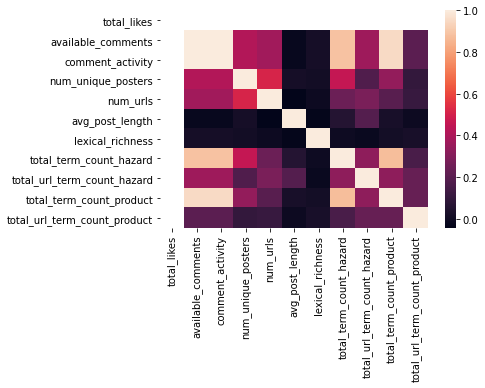

In [91]:
sns.heatmap(temp.corr())

# K-Means Clustering 

In [44]:
from sklearn import preprocessing
from sklearn.cluster import MiniBatchKMeans

In [45]:
nm_indicators = \
['term_counts',
'url_term_counts',
'total_likes',
'available_comments',
'comment_activity',
'num_unique_posters',
'num_urls',
'avg_post_length',
'lexical_richness', 
'total_term_count_hazard',
'total_url_term_count_hazard',
'total_term_count_product',
'total_url_term_count_product']

fb_indicators = \
['term_counts',
'url_term_counts',
'total_likes',
'available_comments',
'comment_activity',
'num_unique_posters',
'num_urls',
'avg_comment_length',
'avg_post_length',
'lexical_richness', 
'total_term_count_hazard',
'total_url_term_count_hazard',
'total_term_count_product',
'total_url_term_count_product']

In [46]:
#get only the columns we are interested in
nm_subset = nmdf[nmdf.columns[nmdf.columns.isin(nm_indicators)]]
fb_subset = fbdf[fbdf.columns[fbdf.columns.isin(fb_indicators)]]

In [47]:
#normalize the data
nm_normed = preprocessing.StandardScaler(np.array(nm_subset))


/usr/local/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass copy=[[0 17 17 ... 0 2 0]
 [0 5 5 ... 0 0 0]
 [0 13 13 ... 0 1 0]
 ...
 [0 17 17 ... 0 1 0]
 [0 5 5 ... 0 11 0]
 [0 12 12 ... 0 7 0]] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [48]:
fb_normed = preprocessing.StandardScaler(np.array(fb_subset))

/usr/local/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass copy=[[1 0.0 0 ... 0.0 0 0.0]
 [0 0.0 0 ... 0.0 0 0.0]
 [0 0.0 0 ... 1.0 0 0.0]
 ...
 [1 0.0 0 ... 0.0 0 0.0]
 [3 1 1 ... 0.0 0 0.0]
 [1 0.0 0 ... 0.0 0 0.0]] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


# Netmums Clusters based on indicators

In [49]:
kmeans = MiniBatchKMeans(n_clusters=10,random_state=0,batch_size=6)

In [50]:
kmeans.fit(nm_subset)

MiniBatchKMeans(batch_size=6, n_clusters=10, random_state=0)

In [51]:
kmeans.cluster_centers_

array([[0.00000000e+00, 1.90000000e+01, 1.90000000e+01, 5.85714286e+00,
        1.01428571e+01, 2.47191536e+02, 1.14979139e+02, 2.57142857e+00,
        2.85714286e-01, 4.71428571e+00, 0.00000000e+00],
       [0.00000000e+00, 2.33333333e+01, 2.33333333e+01, 1.30000000e+01,
        8.83333333e+00, 6.53039680e+02, 1.41250902e+02, 1.91666667e+01,
        1.16666667e+00, 2.05000000e+01, 3.33333333e-01],
       [0.00000000e+00, 4.81666667e+02, 4.81666667e+02, 1.66666667e+01,
        2.95333333e+02, 3.43595130e+02, 1.46145050e+02, 8.66666667e+01,
        0.00000000e+00, 6.10000000e+01, 0.00000000e+00],
       [0.00000000e+00, 2.56666667e+01, 2.56666667e+01, 9.00000000e+00,
        4.50000000e+00, 3.21310876e+02, 1.52139376e+02, 8.22222222e+00,
        2.22222222e-01, 8.22222222e+00, 2.22222222e-01],
       [0.00000000e+00, 3.20000000e+01, 3.20000000e+01, 1.11250000e+01,
        6.50000000e+00, 8.02190273e+02, 1.36340393e+02, 2.70000000e+01,
        2.37500000e+00, 1.98750000e+01, 0.00000000e+

In [52]:
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]

In [53]:
nm_subset = nm_subset.copy()

In [54]:
#assign labels back to DF
nm_subset['cluster'] = kmeans.labels_

In [55]:
#now facebook.
fb_subset = fb_subset.copy()
fb_subset = fb_subset.fillna(0)

kmeans.fit(fb_subset)

#assign labels back to DF
fb_subset['cluster'] = kmeans.labels_

Netmums Clusters


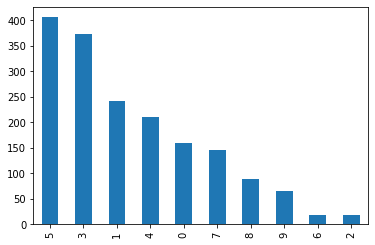

In [56]:
nm_subset['cluster'].value_counts().plot.bar()
print('Netmums Clusters')

Facebook Clusters


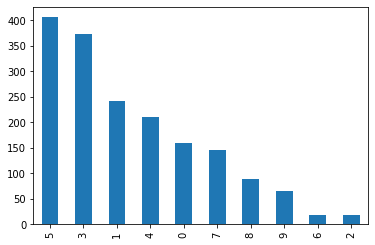

In [57]:
nm_subset['cluster'].value_counts().plot.bar()
print('Facebook Clusters')

In [58]:
means_dict = {}
for i in range(9):
    temp = nmdf.loc[nm_subset.loc[nm_subset.cluster ==i].index]
    means_dict[i] = {str(indicator): np.mean(temp[indicator]) for indicator in nmdf.columns[nmdf.columns.isin(nm_indicators)]}

In [59]:
means_dict

{0: {'total_likes': 0.0,
  'available_comments': 16.52201257861635,
  'comment_activity': 16.52201257861635,
  'num_unique_posters': 6.69811320754717,
  'num_urls': 6.1572327044025155,
  'avg_post_length': 256.0212828167146,
  'lexical_richness': 128.75053753654703,
  'total_term_count_hazard': 4.735849056603773,
  'total_url_term_count_hazard': 0.15723270440251572,
  'total_term_count_product': 3.8742138364779874,
  'total_url_term_count_product': 0.12578616352201258},
 1: {'total_likes': 0.0,
  'available_comments': 23.348547717842322,
  'comment_activity': 23.348547717842322,
  'num_unique_posters': 7.937759336099585,
  'num_urls': 5.331950207468879,
  'avg_post_length': 634.3415299721346,
  'lexical_richness': 147.71397449906328,
  'total_term_count_hazard': 13.514522821576763,
  'total_url_term_count_hazard': 0.44398340248962653,
  'total_term_count_product': 13.925311203319502,
  'total_url_term_count_product': 0.33195020746887965},
 2: {'total_likes': 0.0,
  'available_comments'

In [60]:
nmdf.loc[nm_subset.loc[nm_subset.cluster ==9].index]

,url,title,total_likes,available_comments,comment_activity,num_unique_posters,num_urls,avg_post_length,post_time,lexical_richness,...,url_term_counts_virus,url_term_counts_vomitoxin,url_term_counts_yoghurt,total_term_count,total_url_term_count,total_term_count_hazard,total_url_term_count_hazard,total_term_count_product,total_url_term_count_product,int_post_time
59,https://www.netmums.com/coffeehouse/other-chat...,Do you pay for your Prescriptions?,0,208,208,48,5,435.048,2018-05-11 17:52:00,124.771,...,0,0,0,40,40,34,0,6,0,1.526061e+09
94,https://www.netmums.com/coffeehouse/being-mum-...,Ella’s kitchen pouches,0,44,44,15,25,419.591,2018-10-16 09:03:00,171.044,...,0,0,0,83,83,22,0,61,0,1.539681e+09
101,https://www.netmums.com/coffeehouse/being-mum-...,Baby won't stop screaming,0,71,71,22,49,498.746,2017-06-04 22:31:00,168.099,...,0,0,0,57,57,30,0,27,0,1.496615e+09
177,https://www.netmums.com/coffeehouse/family-foo...,Foods that make ur child hyper and naughty?,0,81,81,15,27,336.963,2016-02-24 07:51:00,171.029,...,0,0,0,78,78,30,2,48,5,1.456300e+09
322,https://www.netmums.com/coffeehouse/coffeehous...,What is the earliest people started weaning th...,0,57,57,21,41,381.316,2017-05-02 11:02:00,158.037,...,0,0,0,55,55,33,0,22,0,1.493723e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5817,https://www.netmums.com/coffeehouse/drop-clini...,3 months old can't fill my baby what can I do??,0,110,110,37,63,448.482,2018-03-08 19:48:00,163.853,...,0,0,0,142,142,99,0,43,0,1.520538e+09
6246,https://www.netmums.com/coffeehouse/childcare-...,2 year old children self serving,0,42,42,16,9,413,2018-04-04 19:21:00,137.121,...,0,0,0,45,45,14,0,31,0,1.522870e+09
6298,https://www.netmums.com/coffeehouse/products-8...,To those who took more than 2 tests to pass dr...,0,155,155,19,8,366.819,2017-02-16 12:33:00,130.8,...,0,0,0,5,5,5,0,0,0,1.487248e+09
6428,https://www.netmums.com/coffeehouse/drop-clini...,Weening- rusks??? Tips please,0,193,193,28,4,343.42,2016-08-16 14:36:00,164.697,...,0,0,0,227,227,141,1,86,0,1.471358e+09


In [61]:
nmdf.loc[nm_subset.loc[nm_subset.cluster ==2].index]

,url,title,total_likes,available_comments,comment_activity,num_unique_posters,num_urls,avg_post_length,post_time,lexical_richness,...,url_term_counts_virus,url_term_counts_vomitoxin,url_term_counts_yoghurt,total_term_count,total_url_term_count,total_term_count_hazard,total_url_term_count_hazard,total_term_count_product,total_url_term_count_product,int_post_time
546,https://www.netmums.com/coffeehouse/becoming-m...,Shettles vs O+12,0,987,987,20,859,325.016,2018-08-09 19:43:00,135.181,...,0,0,0,193,193,175,0,18,0,1.533844e+09
875,https://www.netmums.com/coffeehouse/family-foo...,schools to serve halal only!,0,438,438,25,27,359.719,2019-02-01 09:43:00,126.034,...,0,0,0,242,242,80,0,162,0,1.549014e+09
939,https://www.netmums.com/coffeehouse/money-advi...,"Help needed! struggling to get by each month, ...",0,44543,44543,206,1097,493.739,2019-02-26 19:56:00,157.845,...,0,0,0,12505,12505,4243,25,8262,44,1.551211e+09
1030,https://www.netmums.com/coffeehouse/other-chat...,Christmas Crackers Planning for 2018!,0,5399,5399,279,2997,260.763,2018-12-28 23:00:00,140.707,...,0,0,0,372,372,161,4,211,13,1.546038e+09
1096,https://www.netmums.com/coffeehouse/other-chat...,Christmas crackers planning for 2017,0,7624,7624,308,5534,243.581,2018-05-18 00:14:00,137.863,...,0,0,0,422,422,263,20,159,3,1.526602e+09
1359,https://www.netmums.com/coffeehouse/becoming-m...,TTC with irregular Cycles. Join me,0,523,523,28,367,285.426,2017-11-08 20:41:00,151.265,...,0,0,0,30,30,27,0,3,0,1.510174e+09
1360,https://www.netmums.com/coffeehouse/becoming-m...,January TTC BFP Train,0,2070,2070,13,1515,330.497,2017-12-06 19:48:00,164.796,...,0,0,0,274,274,274,0,0,0,1.512590e+09
1582,https://www.netmums.com/coffeehouse/becoming-m...,Due October 2020,0,523,523,48,4,445.164,2020-08-14 23:00:00,175.983,...,0,0,0,196,196,184,1,12,0,1.597446e+09
2613,https://www.netmums.com/coffeehouse/product-te...,Win a Product of the Year 2021 goody bag worth...,0,498,498,482,3,165.094,2021-02-28 22:52:00,196.765,...,0,0,0,67,67,19,0,48,0,1.614553e+09
2968,https://www.netmums.com/coffeehouse/money-advi...,"Frugal, frugal, frugal!",0,3185,3185,63,209,391.048,2017-04-17 10:10:00,173.526,...,0,0,0,1153,1153,321,1,832,1,1.492424e+09


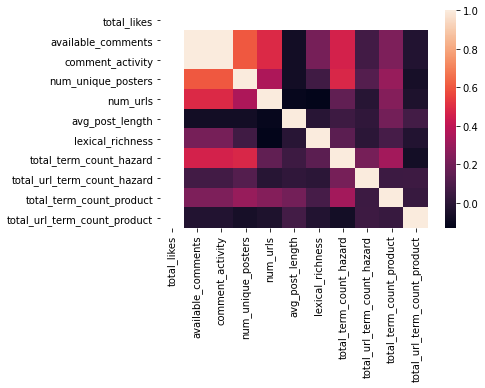

0


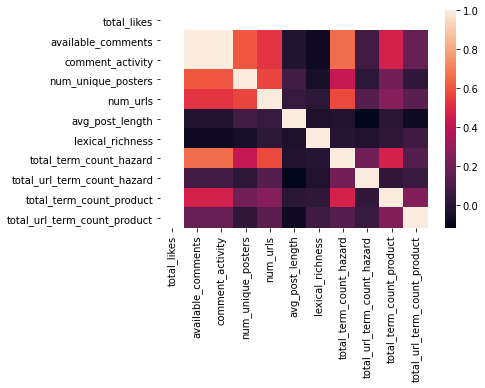

1


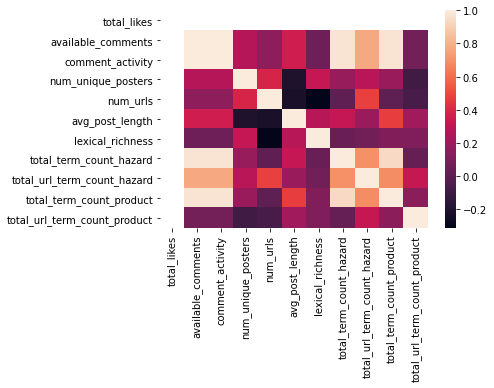

2


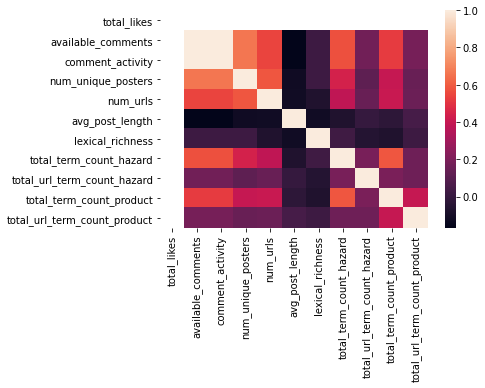

3


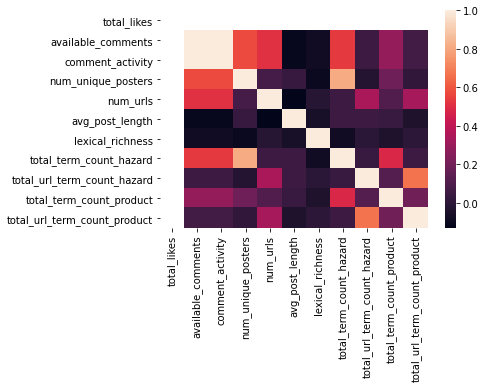

4


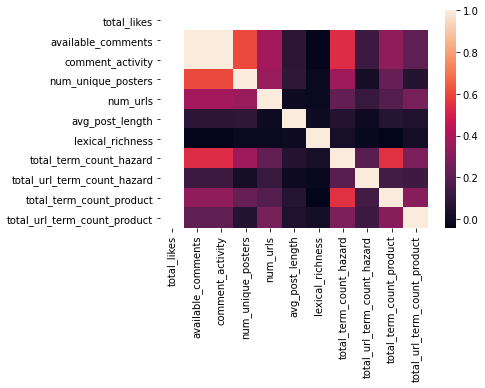

5


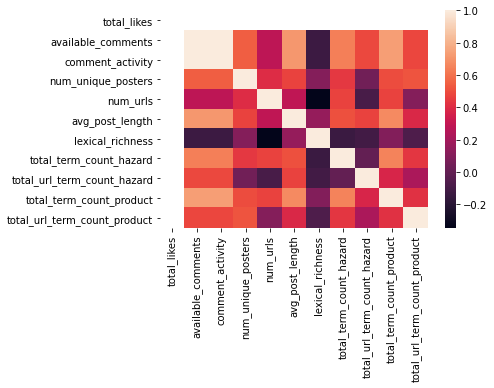

6


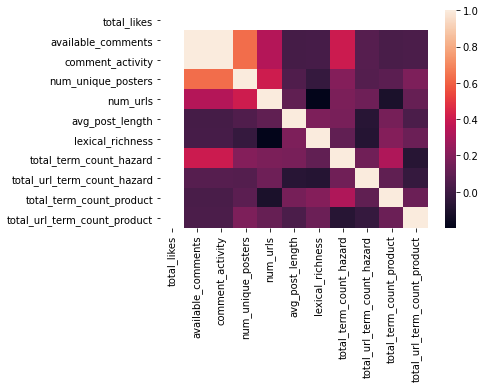

7


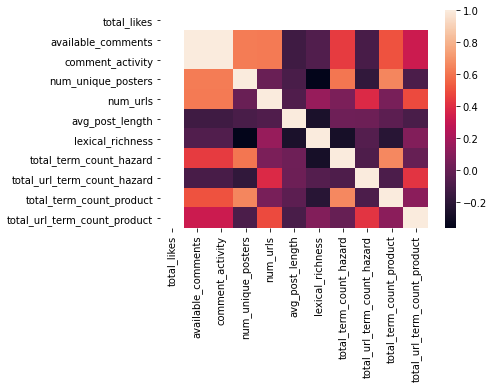

8


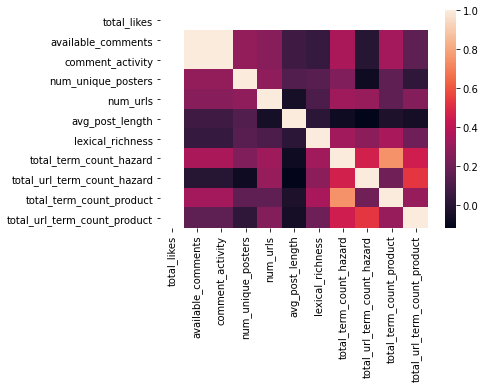

9


In [98]:
for i in range(10):
    temp = nmdf.loc[nm_subset.loc[nm_subset.cluster ==i].index]
    temp = temp[nmdf.columns[nmdf.columns.isin(nm_indicators)]].copy()
    temp = temp.astype(np.float)
    temp = temp.dropna().copy()
    sns.heatmap(temp.corr())
    plt.show()
    print(i)

In [99]:
nmdf.loc[nm_subset.loc[nm_subset.cluster ==6].index]

,url,title,total_likes,available_comments,comment_activity,num_unique_posters,num_urls,avg_post_length,post_time,lexical_richness,...,url_term_counts_virus,url_term_counts_vomitoxin,url_term_counts_yoghurt,total_term_count,total_url_term_count,total_term_count_hazard,total_url_term_count_hazard,total_term_count_product,total_url_term_count_product,int_post_time
113,https://www.netmums.com/coffeehouse/being-mum-...,Can i give my 5 month baby ambrosia custard,0,199,199,32,121,274.879,2017-03-27 15:05:00,150.599,...,0,0,0,133,133,91,0,42,1,1.490627e+09
407,https://www.netmums.com/coffeehouse/becoming-m...,GD mummies what are you eating?,0,82,82,4,82,246.902,2016-11-28 14:59:00,133.901,...,0,0,0,13,13,3,0,10,0,1.480345e+09
408,https://www.netmums.com/coffeehouse/diets-1061...,7 day Chemical Diet...Anyone else doing it?,0,254,254,42,37,301.76,2021-05-18 10:03:00,134.531,...,0,0,0,82,82,61,1,21,5,1.621332e+09
641,https://www.netmums.com/coffeehouse/life-504/l...,Dettol baths,0,140,140,28,3,170.286,2019-06-05 20:03:00,149.641,...,0,0,0,20,20,16,0,4,0,1.559765e+09
1489,https://www.netmums.com/coffeehouse/family-foo...,Forgotten foods!!!!,0,213,213,27,14,224.465,2016-04-19 21:14:00,182.083,...,0,0,0,35,35,15,0,20,1,1.461100e+09
2099,https://www.netmums.com/coffeehouse/becoming-m...,10 Baby names you love but would never use?,0,127,127,35,43,282.173,2016-12-11 02:14:00,136.862,...,0,0,0,13,13,13,0,0,0,1.481422e+09
2112,https://www.netmums.com/coffeehouse/being-mum-...,1/4 black 3/4 white babies!!!,0,84,84,6,0,129.083,2016-08-04 21:28:00,126.939,...,0,0,0,18,18,18,0,0,0,1.470346e+09
2198,https://www.netmums.com/coffeehouse/being-mum-...,Mixed race babies!,0,140,140,22,108,187.829,2018-06-08 21:40:00,111.9,...,0,0,0,20,20,17,0,3,0,1.528494e+09
3741,https://www.netmums.com/coffeehouse/other-chat...,What would YOU put in Room 101 ??,0,92,92,18,0,248.761,2021-02-07 17:36:00,227.738,...,0,0,0,13,13,8,0,5,0,1.612719e+09
4205,https://www.netmums.com/coffeehouse/becoming-m...,Ladies what are you missing drinking/eating/do...,0,71,71,34,36,201.803,2018-02-19 14:21:00,169.245,...,0,0,0,12,12,7,0,5,0,1.519050e+09
